In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
import re
import mygene
import random
import time
import os

from sklearn.manifold import TSNE
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA


## Creating smaller chunk with all genes and random samples

In [28]:
def count_base(data):
    n = float('inf')
    
    for (path, _) in data:
        n = min(n, pd.read_csv(path, usecols=['label']).shape[0])

    return n

In [29]:
def filter_df(df):
    dfg = df.groupby(df["label"]).count()
    
    tcga_count = dfg.iloc[1, 0]
    gtex_count = dfg.iloc[0, 0]
    total_count = tcga_count + gtex_count

    return pd.concat([
        df[df['label'] == 1].sample(n=int(tcga_count * base_count / total_count)),
        df[df['label'] == 0].sample(n=int(gtex_count * base_count / total_count))
    ])

In [30]:
def create_merged_df(data):
    frames = []
    
    for (path, name) in data:
        print('Processing {} dataframe'.format(name))

        df = filter_df(pd.read_csv('../Output/Chunk_Skin.csv', index_col=0))
        df.columns = [(re.sub('\.\d+', '', gene)) for gene in df.columns]
        df.drop(columns=['label'], inplace=True)
        df.insert(loc=0, column='cancer', value=name)
        
        frames.append(df)

    print('Finished')
    return pd.concat(frames)

In [27]:
items = [
    ("../Output/Chunk_Skin.csv", "skin"),
    ("../Output/Chunk_Breast.csv", "breast"),
    ("../Output/Chunk_Thyroid_ThyroidGland.csv", "thyr"),
    ("../Output/Chunk_Colon.csv", "colon"),
    ("../Output/Chunk_LungAdenocarcinoma_Lung.csv", "lungA"),
    ("../Output/Chunk_LungSquamousCellCarcinoma_Lung.csv", "lungS")   
]

base_count = count_base(items)

In [31]:
df = create_merged_df(items)

Processing skin dataframe
Processing breast dataframe
Processing thyr dataframe
Processing colon dataframe
Processing lungA dataframe
Processing lungS dataframe
Finished


In [36]:
df.head()

,cancer,ENSG00000167578,ENSG00000078237,ENSG00000146083,ENSG00000158486,ENSG00000198242,ENSG00000134108,ENSG00000172137,ENSG00000276644,ENSG00000094963,...,ENSG00000107863,ENSG00000213782,ENSG00000146707,ENSG00000158417,ENSG00000089177,ENSG00000186115,ENSG00000009694,ENSG00000123685,ENSG00000105063,ENSG00000181518
TCGA-EB-A44P-01,skin,6.1433,4.3758,4.6871,-9.9658,10.0412,6.1299,-4.2934,-6.5064,-9.9658,...,3.8431,5.8210,3.6335,5.3754,3.2267,-9.9658,-9.9658,1.5661,5.7170,-9.9658
TCGA-EB-A431-01,skin,5.1437,4.2929,3.9002,-4.0350,10.0256,6.3646,-3.3076,-1.6394,-2.8262,...,3.8451,5.5659,4.6445,5.1627,2.1313,-9.9658,-6.5064,0.9716,6.5549,-9.9658
TCGA-EB-A5SF-01,skin,4.9007,2.0004,4.0679,-2.2447,9.8412,3.1701,4.7485,-4.6082,-1.1172,...,-0.0130,3.6428,3.6680,1.6093,-0.5973,-2.7274,-9.9658,0.3573,5.5308,-9.9658
TCGA-EB-A41A-01,skin,5.7337,2.6185,4.2847,-6.5064,10.2545,4.9584,-1.8836,-3.4580,-4.2934,...,4.2048,5.1563,4.6730,5.6651,2.0218,-9.9658,-4.0350,1.9452,5.1416,-9.9658
TCGA-XV-AAZW-01,skin,6.3684,3.2811,3.2511,-3.8160,10.4888,4.9416,2.1114,-5.5735,-1.2828,...,3.0002,4.9194,4.3206,4.5766,1.0711,-5.0116,-9.9658,1.0007,5.0879,-9.9658


In [37]:
df.to_csv('../Output/Chunk_AllCancer_Split_{}.csv'.format(base_count))

In [44]:
df.columns

Index(['cancer', 'ENSG00000167578', 'ENSG00000078237', 'ENSG00000146083',
       'ENSG00000158486', 'ENSG00000198242', 'ENSG00000134108',
       'ENSG00000172137', 'ENSG00000276644', 'ENSG00000094963',
       ...
       'ENSG00000107863', 'ENSG00000213782', 'ENSG00000146707',
       'ENSG00000158417', 'ENSG00000089177', 'ENSG00000186115',
       'ENSG00000009694', 'ENSG00000123685', 'ENSG00000105063',
       'ENSG00000181518'],
      dtype='object', length=19664)

## Selecting genes from results

In [59]:
top = pd.read_csv("../Output/Result_Colon.csv", index_col=0)
top.head()

,Total Count,Intogen,Gradient Boost Classifier,Recursive Feature Elimination,Elastic Net,Boruta Tree,Importances: Gradient Boost Classifier,Importances: Recursive Feature Elimination,Importances: Elastic Net,Importances: Boruta Tree,Importances: Intogen
ENSG00000149451,4,0,1,1,1,1,0.000973,1.0,-0.002107,0.0,0.0
ENSG00000175832,4,0,1,1,1,1,0.004829,1.0,0.003976,0.0,0.0
ENSG00000062038,4,0,1,1,1,1,0.732060,1.0,0.008449,0.1,0.0
ENSG00000143536,3,0,0,1,1,1,0.000000,1.0,-0.005817,0.0,0.0
ENSG00000257524,3,0,1,1,1,0,0.000000,1.0,-0.000494,0.0,0.0


In [94]:
output_path = '../Output/'
ensembls = set()

for filename in os.listdir(output_path):
    if filename[:7] == 'Result_':
        dfi = pd.read_csv(output_path + filename, index_col=0, usecols=['Unnamed: 0', 'Total Count'])
        dfi = dfi[dfi['Total Count'] > 1]
        ensembls.update(dfi.index.tolist())
        
len(ensembls)

854

In [96]:
col_list = list(ensembls)

## Clustering of sample chunk across genes

In [114]:
df_genes = pd.read_csv('../Output/Chunk_AllCancer_Split_594.csv', index_col=0)

In [4]:
df_genes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3558 entries, TCGA-EB-A44P-01 to GTEX-ZDTT-0426-SM-4WKFL
Columns: 19664 entries, cancer to ENSG00000181518
dtypes: float64(19663), object(1)
memory usage: 533.8+ MB


In [5]:
df_genes.head()

,cancer,ENSG00000167578,ENSG00000078237,ENSG00000146083,ENSG00000158486,ENSG00000198242,ENSG00000134108,ENSG00000172137,ENSG00000276644,ENSG00000094963,...,ENSG00000107863,ENSG00000213782,ENSG00000146707,ENSG00000158417,ENSG00000089177,ENSG00000186115,ENSG00000009694,ENSG00000123685,ENSG00000105063,ENSG00000181518
TCGA-EB-A44P-01,skin,6.1433,4.3758,4.6871,-9.9658,10.0412,6.1299,-4.2934,-6.5064,-9.9658,...,3.8431,5.8210,3.6335,5.3754,3.2267,-9.9658,-9.9658,1.5661,5.7170,-9.9658
TCGA-EB-A431-01,skin,5.1437,4.2929,3.9002,-4.0350,10.0256,6.3646,-3.3076,-1.6394,-2.8262,...,3.8451,5.5659,4.6445,5.1627,2.1313,-9.9658,-6.5064,0.9716,6.5549,-9.9658
TCGA-EB-A5SF-01,skin,4.9007,2.0004,4.0679,-2.2447,9.8412,3.1701,4.7485,-4.6082,-1.1172,...,-0.0130,3.6428,3.6680,1.6093,-0.5973,-2.7274,-9.9658,0.3573,5.5308,-9.9658
TCGA-EB-A41A-01,skin,5.7337,2.6185,4.2847,-6.5064,10.2545,4.9584,-1.8836,-3.4580,-4.2934,...,4.2048,5.1563,4.6730,5.6651,2.0218,-9.9658,-4.0350,1.9452,5.1416,-9.9658
TCGA-XV-AAZW-01,skin,6.3684,3.2811,3.2511,-3.8160,10.4888,4.9416,2.1114,-5.5735,-1.2828,...,3.0002,4.9194,4.3206,4.5766,1.0711,-5.0116,-9.9658,1.0007,5.0879,-9.9658


### Filtering with selected genes

In [111]:
df_genes_filtered = df_genes[col_list + ["cancer"]]
df_genes_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3558 entries, TCGA-EB-A44P-01 to GTEX-ZDTT-0426-SM-4WKFL
Columns: 855 entries, ENSG00000227877 to cancer
dtypes: float64(854), object(1)
memory usage: 23.3+ MB


### T-SNE

In [102]:
def tsne(chunk, nlabels, random_state, ncols = 500):
        """
        Create T-SNE graph 
        """
        
        # Defining Model
        model = TSNE(learning_rate=100)
        
        chunk_y = chunk["cancer"]
        chunk_100 = chunk.drop(columns = "cancer").sample(ncols, axis = 1, random_state = random_state)

        # Fitting Model
        transformed = model.fit_transform(chunk_100)

        # Plotting 2d t-Sne
        x_axis = transformed[:, 0]
        y_axis = transformed[:, 1]

        plt.figure(figsize=(16,7))
        ax1 = plt.subplot(1, 2, 1)
        sns.scatterplot(
            x=x_axis, y=y_axis,
            hue=chunk_y,
            palette=sns.color_palette("hls"),
            legend="full",
            alpha=0.3,
            ax=ax1)

#### T-SNE random genes

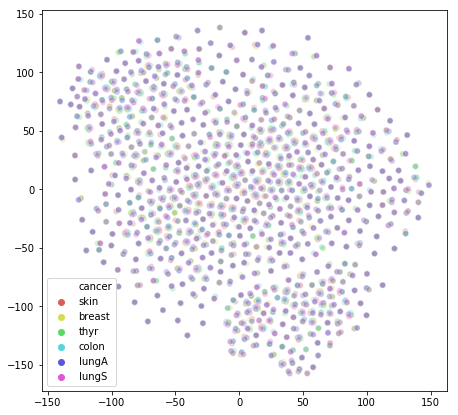

In [103]:
tsne(df_genes, df_genes["cancer"], random_state=1888)

#### T-SNE selected genes

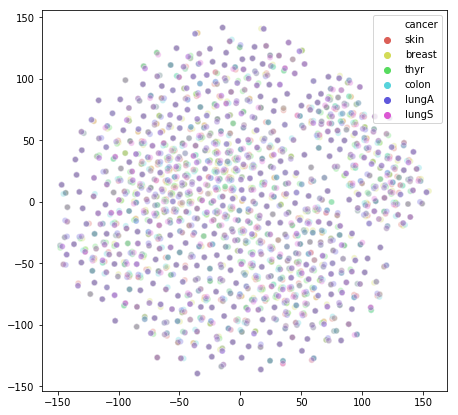

In [104]:
tsne(df_genes_filtered, df_genes["cancer"], random_state=1888)

### PCA

In [115]:
def pca(df, random_state=1888, ncols = 500, n_components=3):
        """
        Create PCA graph 
        """
        
        # Defining x and y
        df_y = df["cancer"]
        df_x_sample = df.drop(columns = "cancer").sample(ncols, axis = 1, random_state = random_state)
        
        # Scaling
        minmax_scaler = MinMaxScaler()
        X_scaled = minmax_scaler.fit_transform(X)
        
        # Defining Model
        model = PCA(n_components=n_components)

        # Fitting Model
        transformed = model.fit_transform(X_scaled)
        
        # Printing explained variance
        print(model.explained_variance_ratio_)
        
        # Creating df with principal components and label
        pca_df = pd.DataFrame(data=transformed, columns=["component_1", "component_2", "component_3"])
        cancer_label = df["cancer"]
        
        pca_df.reset_index(drop=True, inplace=True)
        cancer_label.reset_index(drop=True, inplace=True)
        finalDf = pd.concat([pca_df, cancer_label], axis=1)

        # Plotting 2d PCA

        fig, ax = plt.subplots(figsize=(14,8))
        
        sns.scatterplot(x=finalDf["component_1"], y=finalDf["component_2"], data=finalDf, hue=finalDf["cancer"], ax=ax)
        plt.title('PC1 against PC2')
        plt.xlabel('PC1')
        plt.ylabel('PC2')
        plt.legend(loc='lower right')
        plt.show()

#### PCA random genes

/Users/luciepieckova/anaconda/envs/deeplearning/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype float32, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[0.21749183 0.08793226 0.03465237]


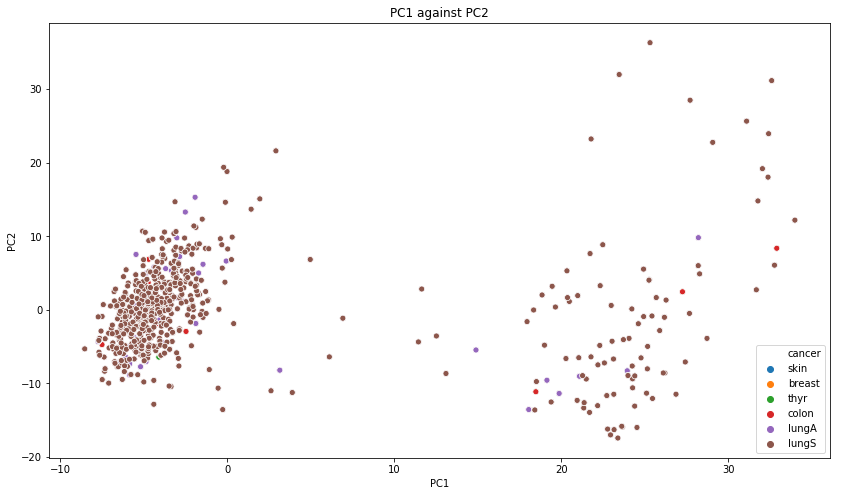

In [116]:
pca(df_genes)

#### PCA selected genes

/Users/luciepieckova/anaconda/envs/deeplearning/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype float32, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[0.21749183 0.08793226 0.03465237]


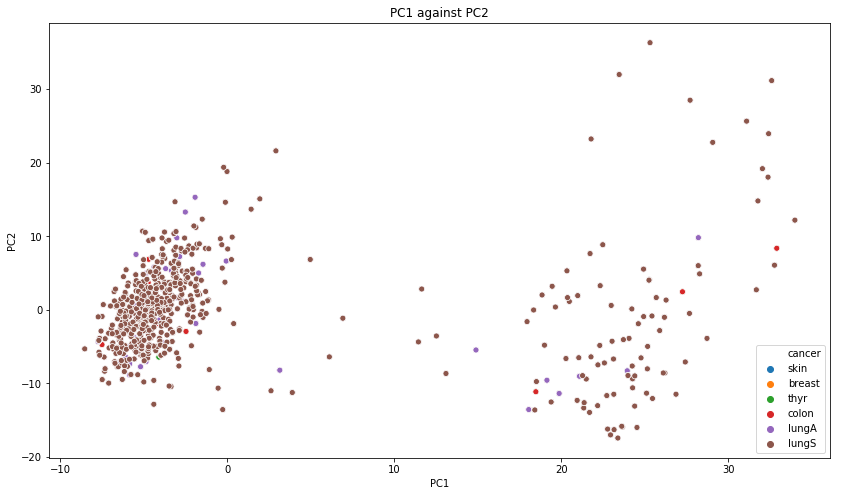

In [113]:
pca(df_genes_filtered)

### T-SNE after PCA

In [53]:
def tsne_from_pca(df, random_state=1888, ncols = 500, n_components=50):
        """
            Create T-SNE graph after performing PCA
        """
        # PCA part
    
        # Defining x and y
        df_y = df["cancer"]
        df_x_sample = df.drop(columns = "cancer").sample(ncols, axis = 1, random_state = random_state)
        
        # Scaling
        minmax_scaler = MinMaxScaler()
        X_scaled = minmax_scaler.fit_transform(X)
        
        # Defining Model
        model = PCA(n_components=n_components)

        # Fitting Model
        transformed = model.fit_transform(X_scaled)
        
        # Printing explained variance
        #print(model.explained_variance_ratio_)
    
        # T-SNE part
    
        # T-SNE model
        tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
        tsne_pca_results = tsne.fit_transform(transformed)
    
        # Plotting 2d t-Sne
        x_axis = tsne_pca_results[:, 0]
        y_axis = tsne_pca_results[:, 1]

        plt.figure(figsize=(16,7))
        ax1 = plt.subplot(1, 2, 1)
        sns.scatterplot(
            x=x_axis, y=y_axis,
            hue=df_y,
            palette=sns.color_palette("hls"),
            legend="full",
            alpha=0.3,
            ax=ax1)

#### T-SNE after PCA random genes

/Users/luciepieckova/anaconda/envs/deeplearning/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype float32, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


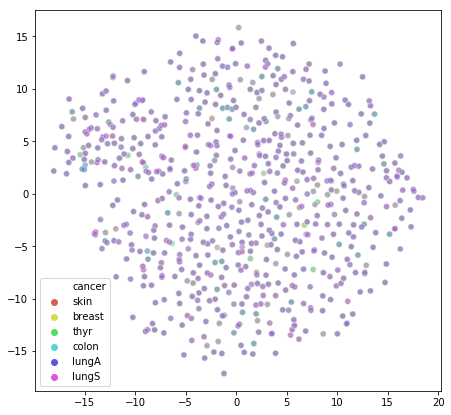

In [54]:
tsne_from_pca(df_genes)

#### T-SNE after PCA selected genes

/Users/luciepieckova/anaconda/envs/deeplearning/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype float32, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


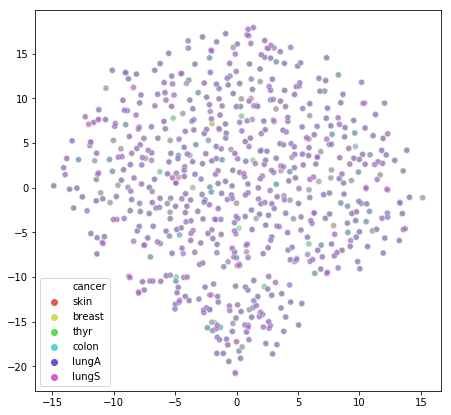

In [110]:
tsne_from_pca(df_genes_filtered)

# Survival data

* OS, overall survival
* PFI, progression-free interval
* DFI, disease-free interval
* DSS, disease-specific survival

In [158]:
survival = pd.read_csv("../Output/Survival_OS.csv", index_col=0)
survival.head()

,sample,OS,OS.time
0,TCGA-OR-A5J1-01,1.0,1355.0
1,TCGA-OR-A5J3-01,0.0,2091.0
2,TCGA-OR-A5J6-01,0.0,2703.0
3,TCGA-OR-A5J8-01,1.0,579.0
4,TCGA-OR-A5J9-01,0.0,1352.0


In [162]:
pdf = pd.read_csv("../Output/Chunk_AllCancers.csv", index_col=0)

In [163]:
pdf.head()

,label,ENSG00000167578,ENSG00000078237,ENSG00000146083,ENSG00000158486,ENSG00000198242,ENSG00000134108,ENSG00000172137,ENSG00000276644,ENSG00000094963,...,ENSG00000107863,ENSG00000213782,ENSG00000146707,ENSG00000158417,ENSG00000089177,ENSG00000186115,ENSG00000009694,ENSG00000123685,ENSG00000105063,ENSG00000181518
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
TCGA-C8-A1HL-01,1_breast,4.9782,2.6624,3.9580,-0.3752,10.7877,5.7415,0.6239,3.3450,-0.1993,...,3.2251,4.9016,2.4727,5.6511,5.1094,-9.9658,-6.5064,1.0293,4.4095,-9.9658
TCGA-EW-A2FS-01,1_breast,5.7035,1.2696,4.2189,-4.2934,10.1460,5.7801,1.4011,4.0532,2.3193,...,3.5863,4.9327,3.1556,5.8510,4.4277,-6.5064,-3.0469,1.4600,4.4081,-9.9658
TCGA-B6-A402-01,1_breast,4.1252,1.6234,5.0180,-2.8262,9.8935,4.8929,2.9729,-3.6259,6.0603,...,5.1107,5.3013,3.9801,5.8592,3.1669,-9.9658,-5.0116,2.5061,4.4490,-9.9658
TCGA-A2-A3XX-01,1_breast,4.8734,1.5998,4.1859,-2.1140,9.8904,4.7247,9.4821,-3.4580,5.2126,...,4.1676,5.1169,4.4223,5.7195,3.0393,-6.5064,-5.5735,2.0707,4.1078,-9.9658
TCGA-Z7-A8R5-01,1_breast,5.4973,1.3846,3.3017,-5.5735,11.1398,4.6651,3.2080,1.4600,2.8522,...,2.6114,4.7176,4.0875,3.6578,2.1509,-9.9658,-4.6082,2.8522,4.4900,-9.9658


In [168]:
pdf = pdf.reset_index().rename(columns={ 'Unnamed: 0': 'sample' })

### Merging with expression data

In [169]:
df_merged = survival.merge(pdf, left_on='sample', right_on='sample')

In [178]:
df_merged.head()

,sample,OS,OS.time,label,ENSG00000167578,ENSG00000078237,ENSG00000146083,ENSG00000158486,ENSG00000198242,ENSG00000134108,...,ENSG00000107863,ENSG00000213782,ENSG00000146707,ENSG00000158417,ENSG00000089177,ENSG00000186115,ENSG00000009694,ENSG00000123685,ENSG00000105063,ENSG00000181518
0,TCGA-3C-AAAU-01,0.0,4047.0,1_breast,5.6522,2.0742,5.0726,-5.5735,10.2750,5.3470,...,4.1094,5.6097,4.9089,4.9165,5.9331,-9.9658,-6.5064,0.1257,5.9414,-9.9658
1,TCGA-3C-AALI-01,0.0,4005.0,1_breast,5.7544,1.4494,4.5243,0.4233,11.0309,5.9709,...,3.2900,5.2567,3.2328,4.6933,5.9568,-5.5735,-6.5064,1.8036,6.2196,-9.9658
2,TCGA-3C-AALJ-01,0.0,1474.0,1_breast,5.5148,2.0638,4.8778,-5.0116,11.1366,5.3534,...,3.3605,5.0875,3.8228,4.8115,2.8858,-2.7274,-4.6082,1.8201,5.9286,-9.9658
3,TCGA-4H-AAAK-01,0.0,348.0,1_breast,4.9486,2.5112,5.0571,-6.5064,10.7401,5.6789,...,4.4270,5.1875,3.8729,5.0610,3.8259,-2.3884,-4.0350,1.0915,5.6244,-9.9658
4,TCGA-A1-A0SB-01,0.0,259.0,1_breast,4.1417,2.4649,4.8435,-9.9658,11.1248,5.3345,...,4.8274,5.3173,3.4635,5.1831,3.1971,-1.5951,-2.2447,0.3115,4.5311,-9.9658


In [185]:
df_merged_filtered = df_merged[["sample", "label", "OS", "OS.time"] + col_list]
df_merged_filtered.head(2)

,sample,label,OS,OS.time,ENSG00000227877,ENSG00000250254,ENSG00000205116,ENSG00000124935,ENSG00000163263,ENSG00000103202,...,ENSG00000164123,ENSG00000226321,ENSG00000101187,ENSG00000107159,ENSG00000266728,ENSG00000161896,ENSG00000165164,ENSG00000197157,ENSG00000204544,ENSG00000131471
0,TCGA-3C-AAAU-01,1_breast,0.0,4047.0,-9.9658,-9.9658,-1.6850,10.2079,-2.1140,7.6493,...,-9.9658,-4.0350,4.5417,-4.2934,-9.9658,-9.9658,-0.9686,6.8478,-6.5064,2.2513
1,TCGA-3C-AALI-01,1_breast,0.0,4005.0,-4.2934,-9.9658,-9.9658,8.2314,-9.9658,7.6283,...,-5.0116,-6.5064,-0.8863,2.7249,-9.9658,-0.6643,-2.3884,6.4631,-6.5064,3.3407


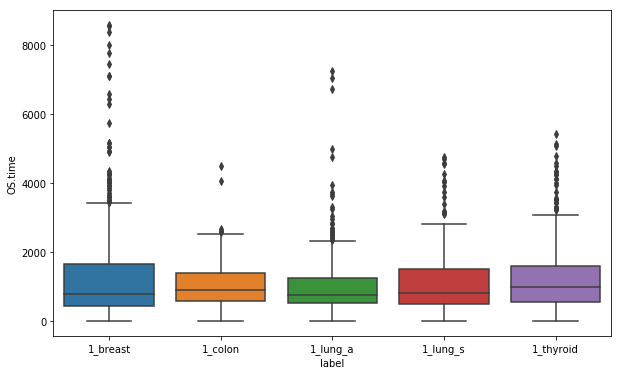

In [238]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x="label", y="OS.time", data=df_merged_filtered) #hue="OS", 
plt.show()

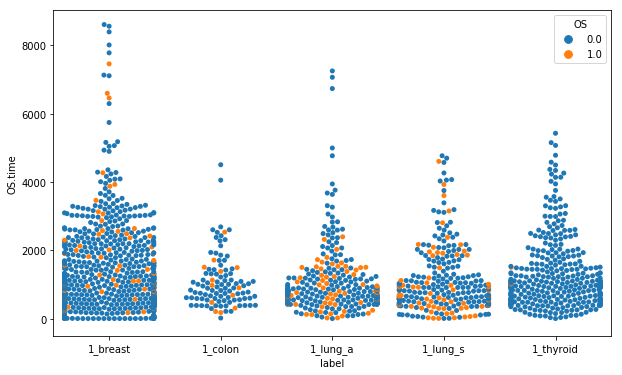

In [242]:
plt.figure(figsize=(10,6))
sns.swarmplot(x="label", y="OS.time", hue="OS", data=df_merged_filtered)
plt.show()

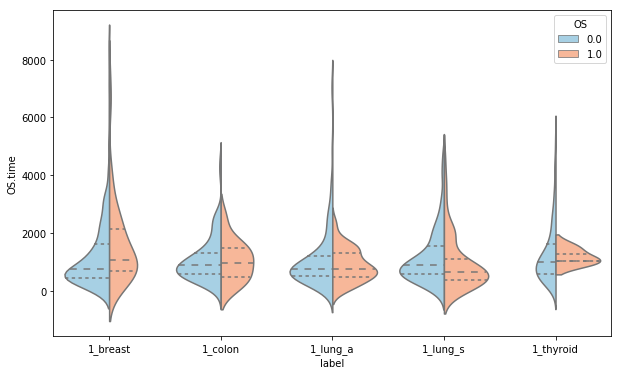

In [267]:
plt.figure(figsize=(10,6))
sns.violinplot(x="label", y="OS.time", hue="OS",
               split=True, inner="quart",
               palette="RdBu_r", #{1.0: "orange", 0.0: "blue"},
               saturation=1,
               data=df_merged_filtered)
#sns.despine(left=True)

#### T-SNE function

In [226]:
def tsne_os(data_x, data_y, random_state=1888, ncols = 500):
        
        model = TSNE(learning_rate=100)
        
        transformed = model.fit_transform(data_x)

        # Plotting 2d t-SNE
        x_axis = transformed[:, 0]
        y_axis = transformed[:, 1]

        plt.figure(figsize=(16,7))
        ax1 = plt.subplot(1, 2, 1)
        sns.scatterplot(
            x=x_axis, y=y_axis,
            hue=data_y,
            #palette=sns.color_palette("hls"), #plt.cm.get_cmap('RdBu', 20),#sns.color_palette("hls"),
            legend="full",
            alpha=0.3,
            ax=ax1)

#### T-SNE OS.time/ cancers

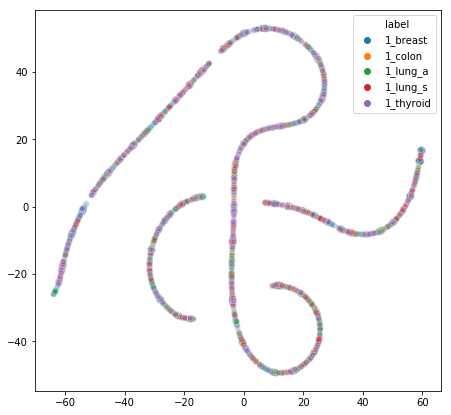

In [227]:
data_y = df_merged_filtered["label"]
data_x = df_merged_filtered["OS.time"].values.reshape(-1, 1) #.sample(ncols, axis = 1, random_state = 1888)

tsne_os(data_x, data_y)

#### T-SNE OS.time/ OS

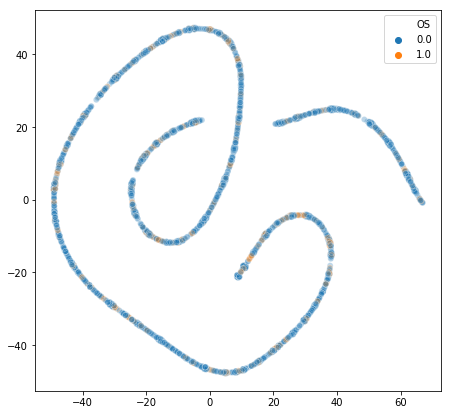

In [190]:
data_y1 = df_merged_filtered["OS"]
data_x1 = df_merged_filtered["OS.time"].values.reshape(-1, 1) #.sample(ncols, axis = 1, random_state = 1888)

tsne_os(data_x1, data_y1)

#### T-SNE OS/ expression

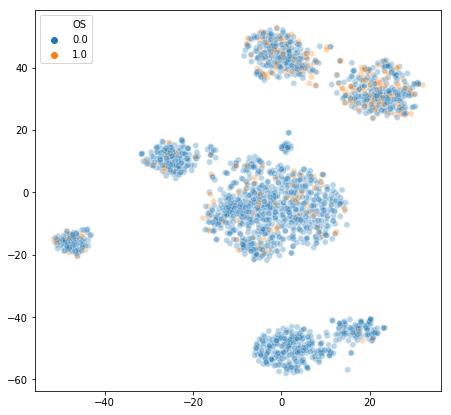

In [193]:
data_y2 = df_merged_filtered["OS"]
data_x2 = df_merged_filtered.drop(columns=["OS.time", "label", "OS", "sample"]) #.sample(ncols, axis = 1, random_state = 1888)

tsne_os(data_x2, data_y2)

#### T-SNE OS/ OS.time + expression

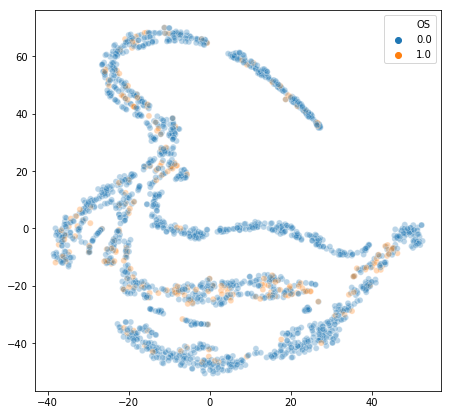

In [200]:
data_y6 = df_merged_filtered["OS"]
data_x6 = df_merged_filtered.drop(columns=["label", "sample", "OS"]) #.sample(ncols, axis = 1, random_state = 1888)

tsne_os(data_x6, data_y6)

#### T-SNE cancers/ expression

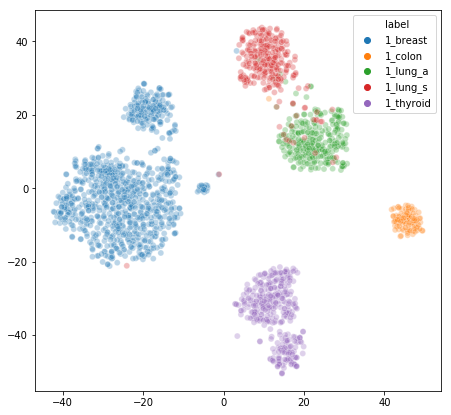

In [195]:
data_y3 = df_merged_filtered["label"]
data_x3 = df_merged_filtered.drop(columns=["OS.time", "label", "OS", "sample"]) #.sample(ncols, axis = 1, random_state = 1888)

tsne_os(data_x3, data_y3)

#### T-SNE cancers/ OS.time + expression

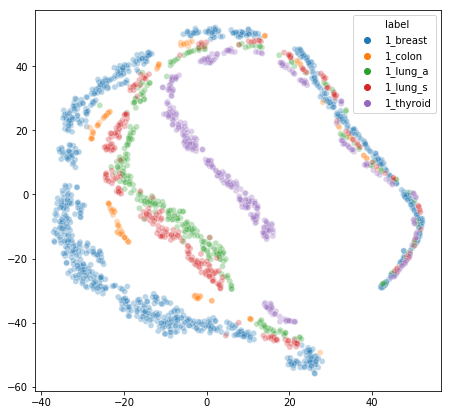

In [201]:
data_y5 = df_merged_filtered["label"]
data_x5 = df_merged_filtered.drop(columns=["label", "sample", "OS"]) #.sample(ncols, axis = 1, random_state = 1888)

tsne_os(data_x5, data_y5)

#### T-SNE cancers/ OS + expression

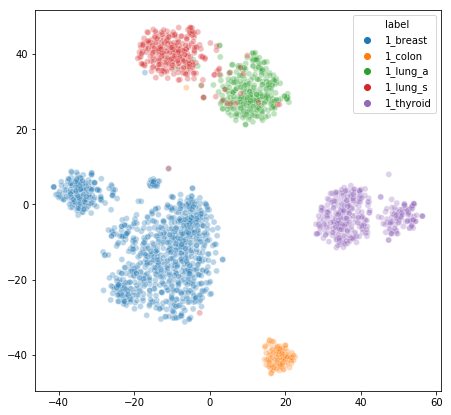

In [202]:
data_y7 = df_merged_filtered["label"]
data_x7 = df_merged_filtered.drop(columns=["label", "sample", "OS.time"]) #.sample(ncols, axis = 1, random_state = 1888)

tsne_os(data_x7, data_y7)

#### T-SNE cancers/ OS + OS.time + expression

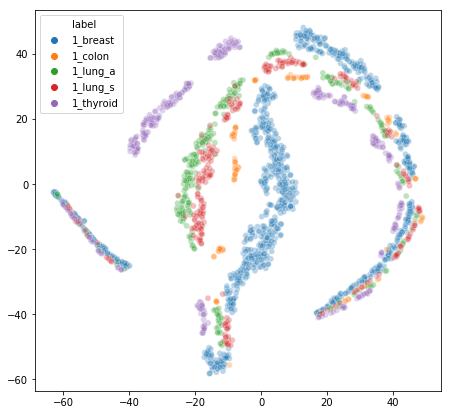

In [203]:
data_y8 = df_merged_filtered["label"]
data_x8 = df_merged_filtered.drop(columns=["label", "sample"]) #.sample(ncols, axis = 1, random_state = 1888)

tsne_os(data_x8, data_y8)

#### T-SNE OS.time/ expression

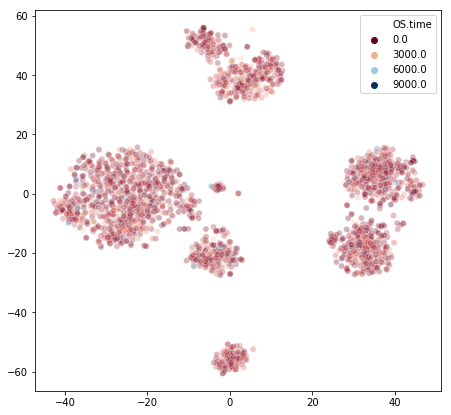

In [221]:
data_y4 = df_merged_filtered["OS.time"]
data_x4 = df_merged_filtered.drop(columns=["OS.time", "label", "OS", "sample"]) #.sample(ncols, axis = 1, random_state = 1888)

tsne_os(data_x4, data_y4)

#cmap=plt.cm.get_cmap('RdBu', 20)
#legend="brief"

#### T-SNE OS.time/ OS + expression

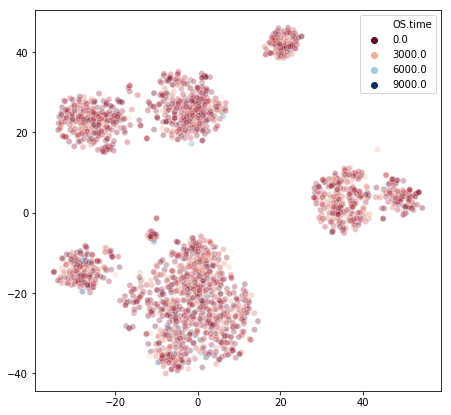

In [222]:
data_y9 = df_merged_filtered["OS.time"]
data_x9 = df_merged_filtered.drop(columns=["OS.time", "label", "sample"]) #.sample(ncols, axis = 1, random_state = 1888)

tsne_os(data_x9, data_y9)

#cmap=plt.cm.get_cmap('RdBu', 20)
#legend="brief"